In [1]:
import pandas as pd # read data line by line
import numpy as np # maths calculation
import statistics # statistics
import matplotlib.pyplot as plt # for plots 
import seaborn as sns # data visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# makes plots appear in the notebook directly
%matplotlib inline  

In [182]:
# Import data and remove "S" column
data = pd.read_excel("SPLIT DATA.xlsx", header=0)


data

X = data.drop('Genotype', axis=1)
cols = list(X.columns.values)
X



,Sleep/L (min),Sleep/D (min),Average bout length/L,Total activity/L,Total activity/D,Activity/waking min/L,Activity/waking min /D
0,-1.598060,-1.206881,-0.924039,0.614584,1.021478,0.278143,1.005653
1,-0.730527,-0.100801,-0.778576,-0.112148,-0.267710,-0.305495,-0.255453
2,-0.822818,0.561301,-0.849437,-0.384245,-0.777312,-0.671141,-0.830100
3,-0.673733,0.454560,-0.710412,0.250647,-0.542663,0.170101,-0.514856
4,-1.319768,-0.342127,-0.742739,1.395506,0.370535,1.291735,0.502300
...,...,...,...,...,...,...,...
253,-0.077392,1.034673,-0.507156,-0.714525,-1.004783,-0.905571,-1.103555
254,-0.585702,-2.365559,-0.788429,-0.590741,1.131901,-0.870550,0.775951
255,0.223617,0.165278,-0.645179,-0.014604,-0.218572,0.164204,-0.129746
256,0.271893,1.033126,-0.719316,-0.996890,-1.140603,-1.213050,-1.312834


In [173]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Adjust the number of components as needed
X_scaled = pca.fit_transform(X)

In [183]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [186]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X.columns)
print("PCA Loadings:\n", loadings)

PCA Loadings:
                              PC1       PC2       PC3       PC4       PC5  \
Sleep/L (min)          -0.364082  0.374584  0.633220 -0.260335 -0.469843   
Sleep/D (min)          -0.314570 -0.470856  0.392189 -0.358801  0.615365   
Average bout length/L  -0.116358  0.155286  0.428477  0.826738  0.281182   
Total activity/L        0.484046 -0.358498  0.237067  0.169534 -0.133518   
Total activity/D        0.378846  0.456828  0.072014 -0.138781  0.261058   
Activity/waking min/L   0.481023 -0.318243  0.418596 -0.093361 -0.274219   
Activity/waking min /D  0.381763  0.418780  0.158172 -0.251543  0.400420   

                             PC6       PC7  
Sleep/L (min)           0.028428  0.191906  
Sleep/D (min)           0.131533  0.028563  
Average bout length/L  -0.033596 -0.122749  
Total activity/L        0.097214  0.724540  
Total activity/D        0.741852 -0.069580  
Activity/waking min/L  -0.070832 -0.634970  
Activity/waking min /D -0.644942  0.119592  


C:\Users\hijaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


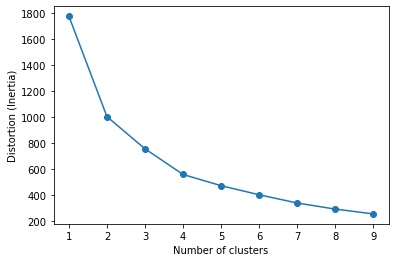

In [127]:
# Elbow Method to find the optimal number of clusters
distortions = []
k_range = range(1, 10)  # Testing from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the closest cluster center

# Plot the elbow curve
plt.plot(k_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

In [131]:
k = 4

# Initialize KMeans and fit the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Add the cluster assignments back to the original dataframe
data['Cluster'] = clusters

In [132]:
data['Cluster'].value_counts()

0    91
3    71
1    55
2    41
Name: Cluster, dtype: int64

In [133]:
# Calculate silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.35


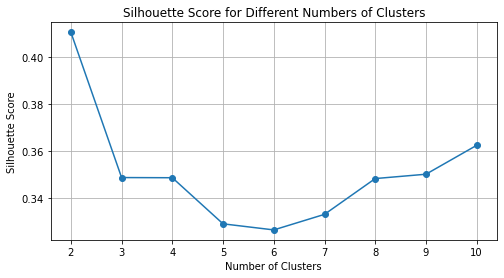

Silhouette Score for k=2: 0.4105737890919964
Silhouette Score for k=3: 0.34888694047249647
Silhouette Score for k=4: 0.34881179886043256
Silhouette Score for k=5: 0.3292404350228786
Silhouette Score for k=6: 0.3266601550030832
Silhouette Score for k=7: 0.3332666668558199
Silhouette Score for k=8: 0.3484578248590876
Silhouette Score for k=9: 0.3503026772718336
Silhouette Score for k=10: 0.36257494694644


In [134]:
range_n_clusters = list(range(2, 11))  # Typically start from 2 to an upper limit
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate the silhouette score and append to list
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Step 4: Plot the silhouette scores to visualize the best k
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Optional: Print the silhouette scores for each k
for k, score in zip(range_n_clusters, silhouette_avg):
    print(f"Silhouette Score for k={k}: {score}")

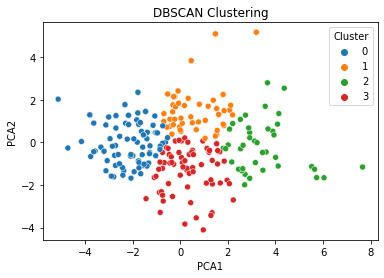

In [135]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

# DBSCAN

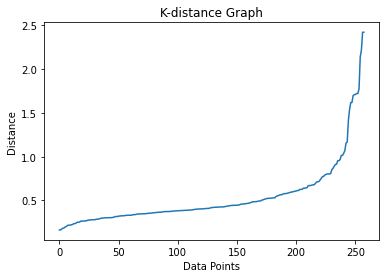

In [113]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)  # Adjust n_neighbors if needed
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4], axis=0)  # 4 is the index of n_neighbors-1
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('K-distance Graph')
plt.show()

In [114]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

1.720310465423518


In [164]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(np.unique(labels))
df2 = data.copy()
df2['cluster'] = labels
df2['cluster'].value_counts()

Number of clusters: 7
Number of noise points: 48
[-1  0  1  2  3  4  5  6]


 1    145
-1     48
 0     35
 2      8
 6      6
 4      6
 5      5
 3      5
Name: cluster, dtype: int64

In [108]:
# Exclude noise points (label -1)
if len(set(labels)) > 1 and -1 not in labels:
    score = silhouette_score(X_scaled, labels)
else:
    score = -1  # Not applicable if only one cluster or noise points only

print(f'Silhouette Score: {score}')

Silhouette Score: -1


In [139]:
df = pd.DataFrame(X_scaled, columns= cols)  # Replace with actual feature names
df['Cluster'] = labels

# Analyze clusters
cluster_summary = df.groupby('Cluster').mean()  # Or use other aggregation methods
print(cluster_summary)

         Sleep/L (min)  Sleep/D (min)  Average bout length/L  \
Cluster                                                        
0             0.526874       0.409018              -0.235746   
1            -0.082943      -1.352437              -0.435209   
2            -1.595913      -1.187374              -0.815159   
3            -1.168903       0.183623              -0.792371   

         Total activity/L  Total activity/D  Activity/waking min/L  \
Cluster                                                              
0               -0.763138         -0.471622              -0.841976   
1               -0.113455          1.313557              -0.115211   
2                2.073501          1.528885               1.924684   
3                0.807205         -0.168026               0.649635   

         Activity/waking min /D  
Cluster                          
0                     -0.469143  
1                      1.245679  
2                      1.565868  
3                     -0

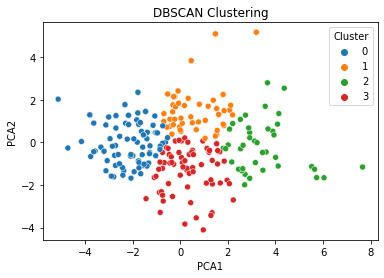

In [158]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

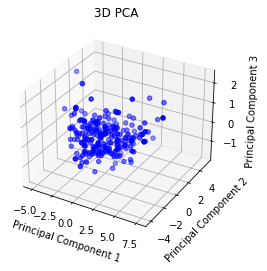

In [167]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], color='b', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')

plt.show()

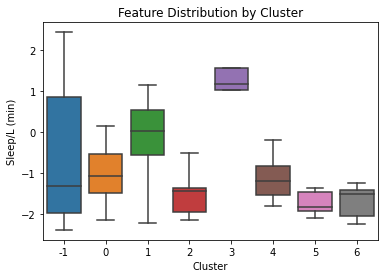

In [152]:
sns.boxplot(x='cluster', y='Sleep/L (min)', data=df2)
plt.title('Feature Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sleep/L (min)')
plt.show()

In [149]:
df2

,Genotype,Sleep/L (min),Sleep/D (min),Average bout length/L,Total activity/L,Total activity/D,Activity/waking min/L,Activity/waking min /D,cluster
0,CS,-1.598060,-1.206881,-0.924039,0.614584,1.021478,0.278143,1.005653,0
1,CS,-0.730527,-0.100801,-0.778576,-0.112148,-0.267710,-0.305495,-0.255453,1
2,CS,-0.822818,0.561301,-0.849437,-0.384245,-0.777312,-0.671141,-0.830100,1
3,CS,-0.673733,0.454560,-0.710412,0.250647,-0.542663,0.170101,-0.514856,1
4,CS,-1.319768,-0.342127,-0.742739,1.395506,0.370535,1.291735,0.502300,0
...,...,...,...,...,...,...,...,...,...
253,CS,-0.077392,1.034673,-0.507156,-0.714525,-1.004783,-0.905571,-1.103555,1
254,CS,-0.585702,-2.365559,-0.788429,-0.590741,1.131901,-0.870550,0.775951,1
255,CS,0.223617,0.165278,-0.645179,-0.014604,-0.218572,0.164204,-0.129746,1
256,CS,0.271893,1.033126,-0.719316,-0.996890,-1.140603,-1.213050,-1.312834,1
